In [3]:
import gc
import os
import time
import math
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook

from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

gc.collect()

62

In [2]:
n = 10

In [3]:
def distance(p1, p2):
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

def getPositions(G):
    return [tuple(i[1].values()) for i in G.nodes.data()]

def getLabels(G):
    return [i[0] for i in G.nodes.data()]

def saveGraph(G, pos, label, title, path):
    f = plt.figure()
    nx.draw_networkx(
        G, 
        pos=pos, 
        node_size=200, 
        label=label,
        node_color="yellow",
        ax=f.add_subplot(111),
    )
    f.suptitle(title, fontsize=20)
    f.savefig(path)
    plt.close()

In [4]:
def generateComTree(n):
    G = nx.Graph()
    for index in range(n):
        G.add_node(
            index, 
            x=np.random.uniform(), 
            y=np.random.uniform()
        )
    
    
    for ind1 in range(n):
        for ind2 in range(n):
            G.add_edge(
                ind1, ind2, 
                weight=distance(
                    list(G.nodes[ind1].values()), list(G.nodes[ind2].values())
                )
            )
            
    positions = [tuple(i[1].values()) for i in G.nodes.data()]
    labels = [i[0] for i in G.nodes.data()]
    nx.draw_networkx(
        G, pos=positions, 
        node_size=200, label=labels,
        node_color="yellow"
    )
    
    return G

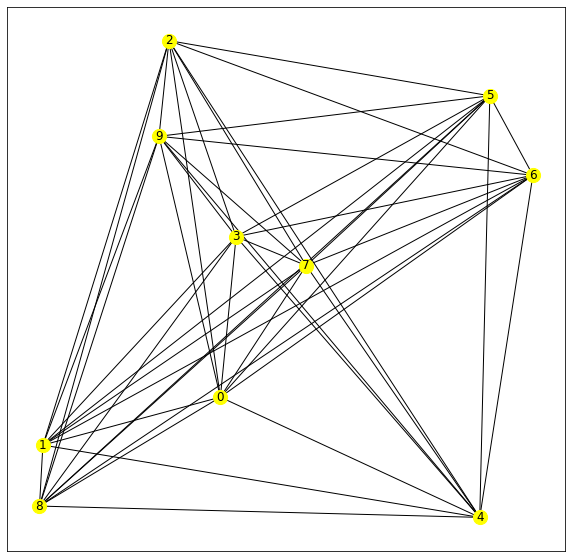

In [5]:
G = generateComTree(n)

In [6]:
def PrimFirst(G):
    n = len(list(G.nodes.keys()))
    V_final = [list(G.nodes.keys())[0]]
    G_final = nx.Graph()

    for _ in range(n-1):
        
        next_edge_weight = float("inf")
        next_edge = None
        for j in V_final:
            for n, w in G.adj.get(j).items():
                if w['weight'] < next_edge_weight and n != j and n not in V_final:
                    next_edge_weight = w['weight']
                    next_edge = (j, n)

        G_final.add_edge(next_edge[0], next_edge[1])
        V_final.append(next_edge[1])
        
    return G_final

CPU times: user 42.8 ms, sys: 42.1 ms, total: 84.9 ms
Wall time: 54.5 ms


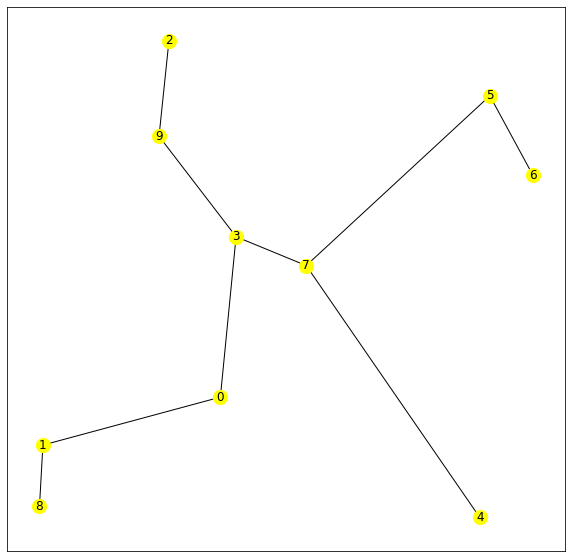

In [7]:
%%time
G_final = PrimFirst(G)
nx.draw_networkx(
    G_final, 
    pos=getPositions(G), 
    node_size=200, 
    label=getLabels(G),
    node_color="yellow"
)

In [8]:
def PrimSecond(G):
    n = len(list(G.nodes.keys()))
    mstSet = set([])
    closeMap = dict.fromkeys(list(range(n)), (None, {'weight': float("inf")}))
    closeMap[0] = sorted(list(G.adj.get(0).items()), key=lambda x: x[1]['weight'])[1]

    G_final = nx.Graph()

    for _ in range(n):

        for n, edge in sorted(closeMap.items(), key=lambda x: x[1][1]['weight']):
            if n not in mstSet:
                mstSet.add(n)
                G_final.add_edge(n, edge[0])
                break

        for v, w in list(G.adj.get(n).items()):
            if v != n and closeMap[v][1]['weight'] > w['weight']:
                closeMap[v] = (n, w)
                
    return G_final

CPU times: user 69.1 ms, sys: 32.4 ms, total: 102 ms
Wall time: 59.7 ms


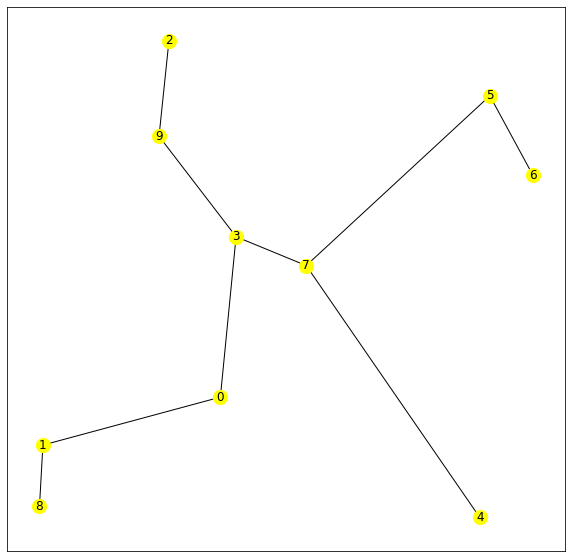

In [9]:
%%time
G_second = PrimSecond(G)
nx.draw_networkx(
    G_second, 
    pos=getPositions(G), 
    node_size=200, 
    label=getLabels(G),
    node_color="yellow"
)

In [24]:
runTimeMap = {
    10: {1:[], 2:[]},
    20: {1:[], 2:[]},
    50: {1:[], 2:[]},
    100: {1:[], 2:[]},
    200: {1:[], 2:[]},
}

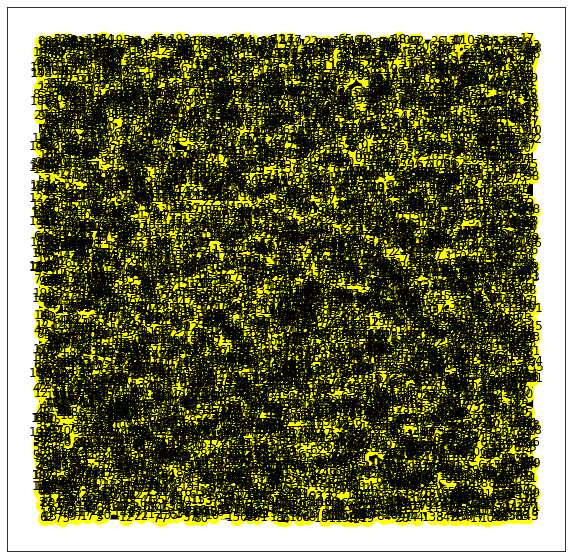

In [25]:
running_times = 20

# Force Not to Show Plots
matplotlib.use("Agg")


for nodeNum in runTimeMap.keys():
    for i in tqdm_notebook(range(running_times)):
        
        # generate complete tree
        G = generateComTree(nodeNum)
        
        
        # first version of Prim's Algo
        start_time = time.time()
        G_final = PrimFirst(G)
        end_time = time.time()
        
        runTimeMap[nodeNum][1].append(end_time - start_time)
        saveGraph(
            G_final, getPositions(G), getLabels(G),
            title="First Version of Prim's Algorithm\nNumNodes=%s" % nodeNum,
            path=os.getcwd() + '/plots/firstVer/' + '1st-%s-%s.png' % (nodeNum, i)
        )
        
        
        # second version of Prim's Algo
        start_time = time.time()
        G_final = PrimSecond(G)
        end_time = time.time()
        
        runTimeMap[nodeNum][2].append(end_time - start_time)
        saveGraph(
            G_final, getPositions(G), getLabels(G),
            title="Second Version of Prim's Algorithm\nNumNodes=%s" % nodeNum,
            path=os.getcwd() + '/plots/secondVer/' + '2nd-%s-%s.png' % (nodeNum, i)
        )
        
        
        gc.collect()

In [26]:
for k,v in runTimeMap.items():
    print(len(v[1]), len(v[2]))

20 20
20 20
20 20
20 20
20 20


In [27]:
dict_of_df = {k: pd.DataFrame(v) for k,v in runTimeMap.items()}
df = pd.concat(dict_of_df, axis=1)

In [28]:
df

10                  20                  50                  100  \
           1         2         1         2         1         2         1   
0   0.001800  0.000286  0.006541  0.002284  0.101561  0.006724  0.401512   
1   0.003680  0.000266  0.006215  0.000745  0.074454  0.007225  0.554010   
2   0.001006  0.000253  0.007483  0.001239  0.097774  0.003318  0.430374   
3   0.005019  0.000720  0.014186  0.000654  0.111016  0.003654  0.610587   
4   0.001045  0.000253  0.012672  0.000748  0.091011  0.004842  0.491028   
5   0.001539  0.000483  0.005948  0.001295  0.088054  0.015497  0.525471   
6   0.000552  0.000301  0.014028  0.001372  0.089545  0.005935  0.469828   
7   0.011779  0.000270  0.009882  0.000704  0.121209  0.003490  0.693637   
8   0.000754  0.000303  0.007969  0.001737  0.101665  0.003326  0.446517   
9   0.001029  0.000280  0.005531  0.000726  0.098005  0.003602  0.646721   
10  0.003846  0.000260  0.008903  0.002549  0.114237  0.007620  0.472356   
11  0.000934  0.000261  0.006772  0.000756  0.128475  0.004194  0.662527   
12  0.001179  0.000799  0.007441  0.000853  0.117119  0.005815  0.838995   
13  0.001239  0.000363  0.007380  0.001177  0.179826  0.007210  0.503309   
14  0.001103  0.000643  0.007178  0.000806  0.069670  0.006573  0.834316   
15  0.001064  0.000531  0.010440  0.000878  0.077930  0.003750  0.450297   
16  0.001100  0.000285  0.010250  0.000738  0.088294  0.006670  0.660632   
17  0.000587  0.000385  0.007090  0.000724  0.136935  0.009246  0.431196   
18  0.001504  0.000391  0.005230  0.001305  0.244697  0.003874  0.789397   
19  0.001378  0.000379  0.006640  0.000712  0.101476  0.004806  0.412422   

                    200            
           2          1         2  
0   0.017320   4.206223  0.074817  
1   0.012684   3.473665  0.077489  
2   0.026033   4.941559  0.057965  
3   0.012998  11.155432  0.297588  
4   0.027762   5.429036  0.055888  
5   0.012689   5.397299  0.115134  
6   0.029557   6.032672  0.097404  
7   0.016760   6.338571  0.057912  
8   0.025845   3.812179  0.076564  
9   0.012817   7.884122  0.122606  
10  0.013850   5.035316  0.050961  
11  0.013307   3.962158  0.075371  
12  0.014318   4.454618  0.052601  
13  0.013084   3.864802  0.082141  
14  0.013260   4.064130  0.087915  
15  0.020554   3.770378  0.062643  
16  0.012720   3.714173  0.104025  
17  0.026185   3.741212  0.052744  
18  0.018198   3.941402  0.212197  
19  0.014728   6.217636  0.180888

In [29]:
meanDF = df.mean(axis=0).reset_index()
meanDF.columns = ['NumOfNodes', 'Vers', 'RunningTime']
pd.merge(
    meanDF.loc[meanDF['Vers'] == 1], 
    meanDF.loc[meanDF['Vers'] == 2], 
    left_on='NumOfNodes',
    right_on='NumOfNodes',
)

,NumOfNodes,Vers_x,RunningTime_x,Vers_y,RunningTime_y
0,10,1,0.002107,2,0.000386
1,20,1,0.008389,2,0.001100
2,50,1,0.111648,2,0.005869
3,100,1,0.566257,2,0.017733
4,200,1,5.071829,2,0.099743


Text(0, 0.5, 'second')

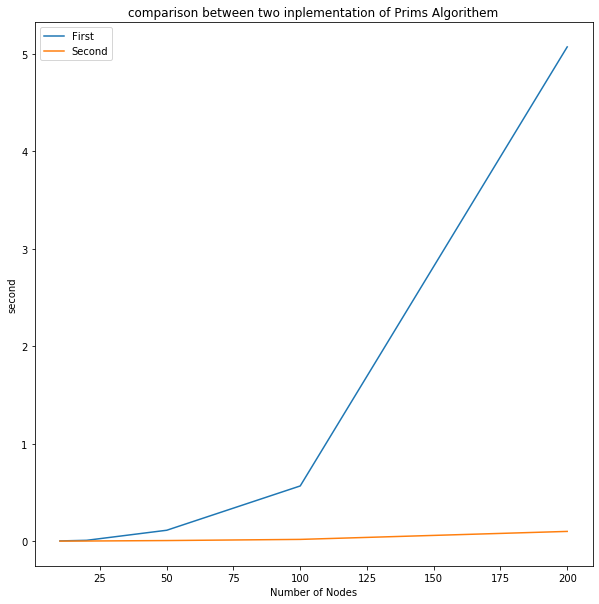

In [30]:
plt.plot(
    meanDF.loc[meanDF['Vers'] == 1]['NumOfNodes'],
    meanDF.loc[meanDF['Vers'] == 1]['RunningTime'],
    label='First'
)
plt.plot(
    meanDF.loc[meanDF['Vers'] == 2]['NumOfNodes'],
    meanDF.loc[meanDF['Vers'] == 2]['RunningTime'],
    label='Second'
)
plt.legend()
plt.title('comparison between two inplementation of Prims Algorithem')
plt.xlabel('Number of Nodes')
plt.ylabel('second')